# Yelp Data Challenge_EDA

## Load the data

In [1]:
# Import the packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

%matplotlib inline
plt.style.use('default')

pd.set_option('display.max_columns', 36)
print (pd.__version__)


0.23.4


In [2]:
# Create interactive plots with plotly library
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *

py.sign_in('kevin11h', 'ilrcfqwrng')

In [3]:
#Load the data
EDA_DF = pd.read_csv('last_2_years_restaurant_reviews.csv', encoding ='utf8')

In [4]:
EDA_DF.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-05-20,0,Pnkrj90xfykhHyo4BSFRsw,5,ABSOLUTE MUST IN VEGAS! Loved everything my bo...,0,cZVQGCZ_fHtTdfiyGVJPdg
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-30,0,Oeh7e6U2xaDQI9L9i4x_Gw,2,I had high hopes for Delmonico's Steakhouse in...,0,li2cBZl60vgqihDJJG7jeA


In [5]:
EDA_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365550 entries, 0 to 365549
Data columns (total 12 columns):
business_id    365550 non-null object
name           365550 non-null object
categories     365550 non-null object
avg_stars      365550 non-null float64
cool           365550 non-null int64
date           365550 non-null object
funny          365550 non-null int64
review_id      365550 non-null object
stars          365550 non-null int64
text           365550 non-null object
useful         365550 non-null int64
user_id        365550 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 33.5+ MB


## Star Category Distribution for Reviews



In [6]:
N_star_categories = 5
colors = np.array(['#62F610','#A5F30D', '#EEC708','#E94E04','#E50029']) 
# 1, 2, 3, 4, and 5 stars respectively

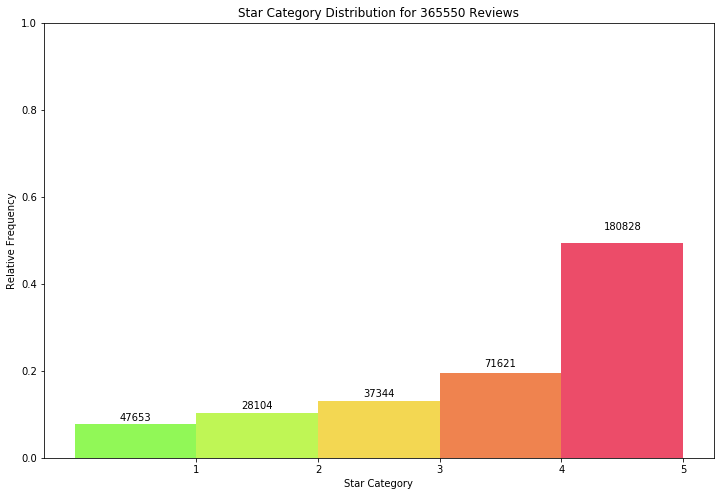

In [7]:
stars_labels = np.array([x_stars+1 for x_stars in range(N_star_categories)])
star_category_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(N_star_categories)
star_category_absolute_frequencies = EDA_DF.stars.value_counts(ascending=True)
star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))

rects = plt.bar(bar_plot_indices, star_category_relative_frequencies, width=1, color=colors, alpha=.7)
for (idx, rect) in enumerate(rects):
        plt.gca().text(rect.get_x()+rect.get_width()/2., 1.05*rect.get_height(), '%d'%int(star_category_absolute_frequencies[idx+1]),
                ha='center', va='bottom')


plt.xticks(bar_plot_indices+.5, stars_labels)
plt.xlabel('Star Category')
plt.ylabel('Relative Frequency')
plt.ylim([0,1])
plt.title('Star Category Distribution for {0} Reviews'.format(len(EDA_DF)))

plt.show()

Most of people write a positive review. Does it mean people like to share prositve experience more than negative ones?

## The length of the text

In [12]:
EDA_DF['text_length'] = EDA_DF['text'].apply(len)

In [13]:
sns.set_style('white')

In [ ]:
# Histogram
g = sns.FacetGrid(EDA_DF, col="stars")
g = g.map(plt.hist, 'text', bins=50, color="g")

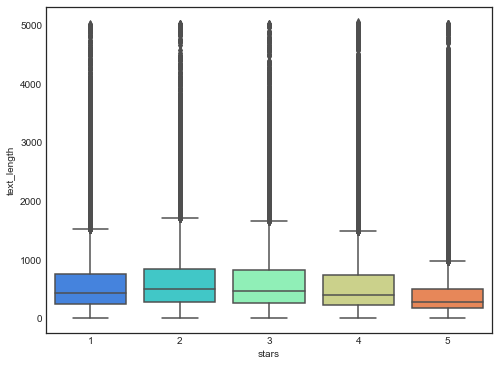

In [18]:
# boxplot
plt.figure(figsize = (8,6))
sns.boxplot(x='stars', y='text_length',data= EDA_DF, palette ='rainbow')

## Find the Correlation in numerical columns

In [20]:
# Groupby the numerical columns and find the mean of the value
stars = EDA_DF.groupby('stars').mean()
stars.head()

,avg_stars,cool,funny,useful,text_length
stars,,,,,
1,3.342444,0.143559,0.361719,0.781336,600.258410
2,3.604807,0.354362,0.454313,0.970645,665.380729
3,3.744457,0.721696,0.566463,1.186804,641.295549
4,3.888852,1.027869,0.612237,1.297022,568.233758
5,4.050739,0.467511,0.235036,0.658748,413.677500


In [21]:
# Use corr()method on this dataframe
stars.corr()

,avg_stars,cool,funny,useful,text_length
avg_stars,1.000000,0.630305,-0.047519,0.098108,-0.678734
cool,0.630305,1.000000,0.716659,0.809261,-0.047196
funny,-0.047519,0.716659,1.000000,0.989223,0.651333
useful,0.098108,0.809261,0.989223,1.000000,0.543191
text_length,-0.678734,-0.047196,0.651333,0.543191,1.000000


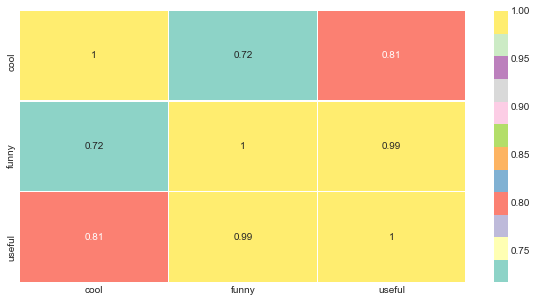

In [22]:
# Create a heatmap to visulize the corrlations
plt.figure(figsize = (10,5))
sns.heatmap(stars.iloc[:, 1:4:].corr(),cmap="Set3",annot=True,linewidths=.5)

The plot showed the funny and useful having a strong relationship.

## Wordcloud of 1 to 5 star review

### Use NLTK to preprocess and tokenize text data

In [23]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

nltk.download() 
# download the english stopwords corpus and the punkt package and maybe the porter stemmer if not present

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [24]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = EDA_DF['text'].values 
# here .values makes result numpy array

In [25]:
# check the size and data type of the documents

documents.dtype,

documents.shape

(365550,)

In [26]:
documents[9]

'In Vegas a few nights seeking a great steak dinner. The petit filet mignon was yummy! Also a great individual portion, anything else simply too large. Dinner rolls the best !! Also the truffle pasta appetizer is a must try! Waiters provided good service too.'

In [27]:
from wordcloud import WordCloud

In [28]:
def plot_word_cloud(data):
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",relative_scaling=.8).generate(str(data))
    plt.figure()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

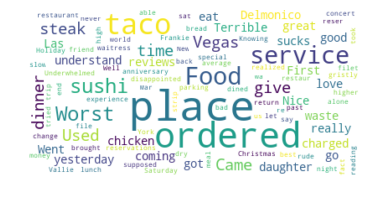

In [29]:
plot_word_cloud(EDA_DF["text"].loc[EDA_DF.stars == 1, ])

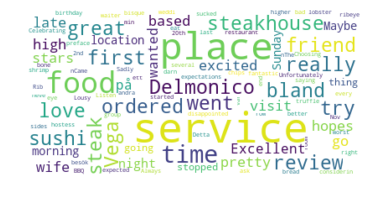

In [30]:
plot_word_cloud(EDA_DF["text"].loc[EDA_DF.stars == 2, ])

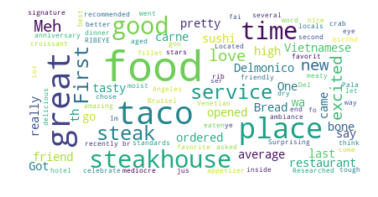

In [31]:
plot_word_cloud(EDA_DF["text"].loc[EDA_DF.stars == 3, ])

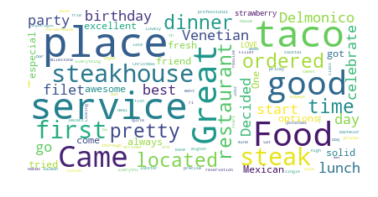

In [32]:
plot_word_cloud(EDA_DF["text"].loc[EDA_DF.stars == 4, ])

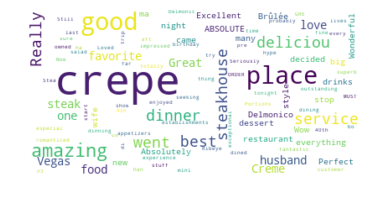

In [33]:
plot_word_cloud(EDA_DF["text"].loc[EDA_DF.stars == 5, ])

In [34]:
# yelp_review_tokens = EDA_DF.text.sum()
# yelp_review_vocabulary = nltk.FreqDist(yelp_review_tokens.split())

In [35]:
# yelp_review_vocabulary_counts = np.array(yelp_review_vocabulary.values())
# yelp_review_vocabulary_tokens = yelp_review_vocabulary.keys()

# # A Zipf plot
# ranks = np.arange(1, len(yelp_review_vocabulary_counts)+1)
# indices = np.argsort(-yelp_review_vocabulary_counts)
# frequencies = yelp_review_vocabulary_counts[indices]
# plt.loglog(ranks, frequencies, marker=".")
# plt.title("Zipf plot for Yelp corpus tokens")
# plt.xlabel("Frequency rank of token")
# plt.ylabel("Absolute frequency of token")
# plt.grid(True)
# for n in list(np.logspace(-0.5, np.log10(len(yelp_review_vocabulary_counts)), 20).astype(int)):
#     dummy = plt.text(ranks[n-1], frequencies[n-1], " " + yelp_review_vocabulary_tokens[indices[n-1]], 
#                  verticalalignment="bottom",
#                  horizontalalignment="left")

# # show()

In [36]:
# tokens_sorted =  []
# i =0;
# for tok in yelp_review_vocabulary_tokens:
#     tokens_sorted.append(yelp_review_vocabulary_tokens[indices[i]])
#     i = i + 1

In [37]:
# # Interactive plot for frequency VS rank
# trace0 = go.Scatter(
#     x = ranks,
#     y = frequencies,
#     text = tokens_sorted,
#     mode='markers',
#     marker=dict(size=4,
#                 line=dict(width=1)
#                )
# )
# # Code for loglog plot
# layout = go.Layout(
#     title='Zipf`s plot for Yelp corpus',
#     hovermode='closest',
#     xaxis=dict(
#         title='Frequency rank of token',
#         type='log',
#         autorange=True
#     ),
#     yaxis=dict(
#         title='Absolute frequency of token',
#         type='log',
#         autorange=True
#     )
# )

# layout = go.Layout(
#     title='Frequency vs Rank for a sample of yelp review dataset',
#     hovermode='closest',
#     xaxis=dict(
#         title='Rank of words',
#         ticklen=5,
#         zeroline=False,
#         gridwidth=2,
#     ),
#     yaxis=dict(
#         title='Frequency of word',
#         ticklen=5,
#         gridwidth=2,
#     ),
# )
# fig = go.Figure(data=[trace0], layout=layout)
# py.iplot(fig, filename='Yelp word frequency vs rank')